In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
"""
    A fully connected neural network model designed for image classification tasks, particularly 
    for datasets like MNIST with 28x28 pixel grayscale images. The model consists of 4 linear 
    (fully connected) layers with ReLU activation functions.

    Architecture:
    - Input Layer: Accepts input images reshaped into a vector of 784 features (28*28).
    - Hidden Layer 1: Transforms 784 features into 256 features using a linear layer followed by ReLU activation.
    - Hidden Layer 2: Another linear layer with 256 features and ReLU activation.
    - Hidden Layer 3: A third linear layer with 256 features and ReLU activation.
    - Output Layer: Maps the 256 features to 10 output classes, suitable for classification tasks with 10 categories.

    The model uses ReLU activations to introduce non-linearity after each hidden layer, enabling it 
    to learn complex patterns in the data. The final output layer does not have an activation function, 
    allowing the use of a suitable loss function like CrossEntropyLoss for classification tasks.

    Forward Pass:
    - Reshapes the input tensor from a 2D image (batch_size, 1, 28, 28) to a flat vector (batch_size, 784).
    - Passes the reshaped input through three hidden layers with ReLU activations.
    - Outputs a tensor with 10 features corresponding to the 10 classes.
"""

class SimpleNNModel(nn.Module):
    def __init__(self):
        super(SimpleNNModel, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [12]:
model = SimpleNNModel().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [13]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Randomly shuffle the labels
train_labels = np.array(train_dataset.targets)
random.shuffle(train_labels)
train_dataset.targets = torch.tensor(train_labels)

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)


In [14]:
def train(model, train_loader, optimizer, criterion, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, target) in tqdm(enumerate(train_loader), total=len(train_loader)):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(train_loader)

In [15]:
def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()

    return test_loss / len(test_loader)

In [16]:
train_losses = []
test_losses = []
epochs = 100

for epoch in range(1, epochs + 1):
    train_loss = train(model, train_loader, optimizer, criterion, epoch)
    test_loss = test(model, test_loader, criterion)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

100%|██████████| 469/469 [00:04<00:00, 111.41it/s]


Epoch 1: Train Loss: 2.3024, Test Loss: 2.3046


100%|██████████| 469/469 [00:03<00:00, 118.38it/s]


Epoch 2: Train Loss: 2.3017, Test Loss: 2.3031


100%|██████████| 469/469 [00:04<00:00, 111.71it/s]


Epoch 3: Train Loss: 2.3014, Test Loss: 2.3006


100%|██████████| 469/469 [00:03<00:00, 118.08it/s]


Epoch 4: Train Loss: 2.3010, Test Loss: 2.3108


100%|██████████| 469/469 [00:04<00:00, 112.75it/s]


Epoch 5: Train Loss: 2.3007, Test Loss: 2.3103


100%|██████████| 469/469 [00:03<00:00, 120.83it/s]


Epoch 6: Train Loss: 2.3002, Test Loss: 2.3152


100%|██████████| 469/469 [00:03<00:00, 125.63it/s]


Epoch 7: Train Loss: 2.2991, Test Loss: 2.3165


100%|██████████| 469/469 [00:04<00:00, 111.09it/s]


Epoch 8: Train Loss: 2.2976, Test Loss: 2.3054


100%|██████████| 469/469 [00:03<00:00, 120.35it/s]


Epoch 9: Train Loss: 2.2951, Test Loss: 2.3108


100%|██████████| 469/469 [00:04<00:00, 112.46it/s]


Epoch 10: Train Loss: 2.2925, Test Loss: 2.3466


100%|██████████| 469/469 [00:03<00:00, 118.66it/s]


Epoch 11: Train Loss: 2.2892, Test Loss: 2.3372


100%|██████████| 469/469 [00:04<00:00, 111.94it/s]


Epoch 12: Train Loss: 2.2847, Test Loss: 2.3345


100%|██████████| 469/469 [00:03<00:00, 129.77it/s]


Epoch 13: Train Loss: 2.2796, Test Loss: 2.3354


100%|██████████| 469/469 [00:04<00:00, 114.48it/s]


Epoch 14: Train Loss: 2.2739, Test Loss: 2.3348


100%|██████████| 469/469 [00:04<00:00, 113.53it/s]


Epoch 15: Train Loss: 2.2661, Test Loss: 2.3534


100%|██████████| 469/469 [00:03<00:00, 118.64it/s]


Epoch 16: Train Loss: 2.2582, Test Loss: 2.3426


100%|██████████| 469/469 [00:04<00:00, 111.94it/s]


Epoch 17: Train Loss: 2.2482, Test Loss: 2.3825


100%|██████████| 469/469 [00:03<00:00, 122.71it/s]


Epoch 18: Train Loss: 2.2363, Test Loss: 2.3854


100%|██████████| 469/469 [00:04<00:00, 114.50it/s]


Epoch 19: Train Loss: 2.2237, Test Loss: 2.3987


100%|██████████| 469/469 [00:03<00:00, 122.49it/s]


Epoch 20: Train Loss: 2.2102, Test Loss: 2.4090


100%|██████████| 469/469 [00:03<00:00, 130.61it/s]


Epoch 21: Train Loss: 2.1954, Test Loss: 2.4250


100%|██████████| 469/469 [00:04<00:00, 113.35it/s]


Epoch 22: Train Loss: 2.1810, Test Loss: 2.4331


100%|██████████| 469/469 [00:03<00:00, 118.47it/s]


Epoch 23: Train Loss: 2.1638, Test Loss: 2.4334


100%|██████████| 469/469 [00:04<00:00, 111.52it/s]


Epoch 24: Train Loss: 2.1476, Test Loss: 2.4843


100%|██████████| 469/469 [00:03<00:00, 119.09it/s]


Epoch 25: Train Loss: 2.1287, Test Loss: 2.5047


100%|██████████| 469/469 [00:04<00:00, 111.99it/s]


Epoch 26: Train Loss: 2.1107, Test Loss: 2.5187


100%|██████████| 469/469 [00:03<00:00, 127.51it/s]


Epoch 27: Train Loss: 2.0916, Test Loss: 2.5661


100%|██████████| 469/469 [00:04<00:00, 108.91it/s]


Epoch 28: Train Loss: 2.0720, Test Loss: 2.5780


100%|██████████| 469/469 [00:04<00:00, 110.08it/s]


Epoch 29: Train Loss: 2.0529, Test Loss: 2.6544


100%|██████████| 469/469 [00:04<00:00, 112.88it/s]


Epoch 30: Train Loss: 2.0348, Test Loss: 2.6522


100%|██████████| 469/469 [00:04<00:00, 109.92it/s]


Epoch 31: Train Loss: 2.0150, Test Loss: 2.6846


100%|██████████| 469/469 [00:04<00:00, 111.58it/s]


Epoch 32: Train Loss: 1.9948, Test Loss: 2.7602


100%|██████████| 469/469 [00:04<00:00, 111.08it/s]


Epoch 33: Train Loss: 1.9778, Test Loss: 2.7622


100%|██████████| 469/469 [00:03<00:00, 125.48it/s]


Epoch 34: Train Loss: 1.9585, Test Loss: 2.7977


100%|██████████| 469/469 [00:04<00:00, 111.53it/s]


Epoch 35: Train Loss: 1.9405, Test Loss: 2.8668


100%|██████████| 469/469 [00:04<00:00, 116.30it/s]


Epoch 36: Train Loss: 1.9228, Test Loss: 2.9068


100%|██████████| 469/469 [00:04<00:00, 108.46it/s]


Epoch 37: Train Loss: 1.9077, Test Loss: 2.9763


100%|██████████| 469/469 [00:04<00:00, 114.53it/s]


Epoch 38: Train Loss: 1.8856, Test Loss: 3.0317


100%|██████████| 469/469 [00:04<00:00, 108.50it/s]


Epoch 39: Train Loss: 1.8684, Test Loss: 3.0234


100%|██████████| 469/469 [00:03<00:00, 119.54it/s]


Epoch 40: Train Loss: 1.8530, Test Loss: 3.1470


100%|██████████| 469/469 [00:04<00:00, 113.36it/s]


Epoch 41: Train Loss: 1.8433, Test Loss: 3.1495


100%|██████████| 469/469 [00:04<00:00, 107.70it/s]


Epoch 42: Train Loss: 1.8241, Test Loss: 3.1951


100%|██████████| 469/469 [00:04<00:00, 113.97it/s]


Epoch 43: Train Loss: 1.8133, Test Loss: 3.2902


100%|██████████| 469/469 [00:04<00:00, 106.98it/s]


Epoch 44: Train Loss: 1.7953, Test Loss: 3.2796


100%|██████████| 469/469 [00:04<00:00, 113.69it/s]


Epoch 45: Train Loss: 1.7822, Test Loss: 3.2960


100%|██████████| 469/469 [00:04<00:00, 108.77it/s]


Epoch 46: Train Loss: 1.7662, Test Loss: 3.4993


100%|██████████| 469/469 [00:03<00:00, 125.93it/s]


Epoch 47: Train Loss: 1.7548, Test Loss: 3.4305


100%|██████████| 469/469 [00:04<00:00, 108.33it/s]


Epoch 48: Train Loss: 1.7414, Test Loss: 3.5136


100%|██████████| 469/469 [00:04<00:00, 116.25it/s]


Epoch 49: Train Loss: 1.7302, Test Loss: 3.5340


100%|██████████| 469/469 [00:04<00:00, 108.29it/s]


Epoch 50: Train Loss: 1.7150, Test Loss: 3.6045


100%|██████████| 469/469 [00:04<00:00, 114.03it/s]


Epoch 51: Train Loss: 1.7096, Test Loss: 3.6099


100%|██████████| 469/469 [00:04<00:00, 109.64it/s]


Epoch 52: Train Loss: 1.6954, Test Loss: 3.7319


100%|██████████| 469/469 [00:03<00:00, 128.26it/s]


Epoch 53: Train Loss: 1.6837, Test Loss: 3.7394


100%|██████████| 469/469 [00:04<00:00, 111.28it/s]


Epoch 54: Train Loss: 1.6745, Test Loss: 3.8482


100%|██████████| 469/469 [00:04<00:00, 112.86it/s]


Epoch 55: Train Loss: 1.6642, Test Loss: 3.8061


100%|██████████| 469/469 [00:04<00:00, 113.13it/s]


Epoch 56: Train Loss: 1.6493, Test Loss: 3.9096


100%|██████████| 469/469 [00:04<00:00, 114.09it/s]


Epoch 57: Train Loss: 1.6390, Test Loss: 3.9074


100%|██████████| 469/469 [00:04<00:00, 111.74it/s]


Epoch 58: Train Loss: 1.6309, Test Loss: 4.1317


100%|██████████| 469/469 [00:04<00:00, 109.63it/s]


Epoch 59: Train Loss: 1.6287, Test Loss: 4.1244


100%|██████████| 469/469 [00:03<00:00, 128.98it/s]


Epoch 60: Train Loss: 1.6156, Test Loss: 4.1427


100%|██████████| 469/469 [00:04<00:00, 108.98it/s]


Epoch 61: Train Loss: 1.6067, Test Loss: 4.2256


100%|██████████| 469/469 [00:04<00:00, 114.65it/s]


Epoch 62: Train Loss: 1.5955, Test Loss: 4.2093


100%|██████████| 469/469 [00:04<00:00, 109.84it/s]


Epoch 63: Train Loss: 1.5863, Test Loss: 4.2121


100%|██████████| 469/469 [00:04<00:00, 113.28it/s]


Epoch 64: Train Loss: 1.5897, Test Loss: 4.3561


100%|██████████| 469/469 [00:04<00:00, 110.84it/s]


Epoch 65: Train Loss: 1.5730, Test Loss: 4.3886


100%|██████████| 469/469 [00:03<00:00, 120.84it/s]


Epoch 66: Train Loss: 1.5608, Test Loss: 4.4038


100%|██████████| 469/469 [00:04<00:00, 114.75it/s]


Epoch 67: Train Loss: 1.5507, Test Loss: 4.4049


100%|██████████| 469/469 [00:04<00:00, 106.55it/s]


Epoch 68: Train Loss: 1.5417, Test Loss: 4.5099


100%|██████████| 469/469 [00:04<00:00, 116.16it/s]


Epoch 69: Train Loss: 1.5404, Test Loss: 4.5893


100%|██████████| 469/469 [00:04<00:00, 107.35it/s]


Epoch 70: Train Loss: 1.5390, Test Loss: 4.6115


100%|██████████| 469/469 [00:04<00:00, 116.88it/s]


Epoch 71: Train Loss: 1.5252, Test Loss: 4.6601


100%|██████████| 469/469 [00:04<00:00, 109.71it/s]


Epoch 72: Train Loss: 1.5283, Test Loss: 4.7353


100%|██████████| 469/469 [00:03<00:00, 122.01it/s]


Epoch 73: Train Loss: 1.5231, Test Loss: 4.8439


100%|██████████| 469/469 [00:03<00:00, 118.84it/s]


Epoch 74: Train Loss: 1.5104, Test Loss: 4.9470


100%|██████████| 469/469 [00:04<00:00, 113.52it/s]


Epoch 75: Train Loss: 1.5007, Test Loss: 4.9329


100%|██████████| 469/469 [00:04<00:00, 111.03it/s]


Epoch 76: Train Loss: 1.4968, Test Loss: 4.9124


100%|██████████| 469/469 [00:04<00:00, 112.30it/s]


Epoch 77: Train Loss: 1.4870, Test Loss: 5.0318


100%|██████████| 469/469 [00:04<00:00, 111.53it/s]


Epoch 78: Train Loss: 1.4807, Test Loss: 5.1563


100%|██████████| 469/469 [00:04<00:00, 112.52it/s]


Epoch 79: Train Loss: 1.4863, Test Loss: 5.1489


100%|██████████| 469/469 [00:03<00:00, 118.95it/s]


Epoch 80: Train Loss: 1.4807, Test Loss: 5.1874


100%|██████████| 469/469 [00:04<00:00, 107.68it/s]


Epoch 81: Train Loss: 1.4649, Test Loss: 5.1622


100%|██████████| 469/469 [00:03<00:00, 118.06it/s]


Epoch 82: Train Loss: 1.4578, Test Loss: 5.4433


100%|██████████| 469/469 [00:04<00:00, 111.29it/s]


Epoch 83: Train Loss: 1.4510, Test Loss: 5.3153


100%|██████████| 469/469 [00:04<00:00, 111.35it/s]


Epoch 84: Train Loss: 1.4460, Test Loss: 5.4178


100%|██████████| 469/469 [00:04<00:00, 111.24it/s]


Epoch 85: Train Loss: 1.4533, Test Loss: 5.4585


100%|██████████| 469/469 [00:04<00:00, 112.01it/s]


Epoch 86: Train Loss: 1.4488, Test Loss: 5.4667


100%|██████████| 469/469 [00:03<00:00, 131.63it/s]


Epoch 87: Train Loss: 1.4429, Test Loss: 5.5245


100%|██████████| 469/469 [00:04<00:00, 111.68it/s]


Epoch 88: Train Loss: 1.4266, Test Loss: 5.5786


100%|██████████| 469/469 [00:04<00:00, 112.20it/s]


Epoch 89: Train Loss: 1.4198, Test Loss: 5.6816


100%|██████████| 469/469 [00:04<00:00, 110.25it/s]


Epoch 90: Train Loss: 1.4251, Test Loss: 5.7339


100%|██████████| 469/469 [00:04<00:00, 113.32it/s]


Epoch 91: Train Loss: 1.4324, Test Loss: 5.8805


100%|██████████| 469/469 [00:04<00:00, 109.04it/s]


Epoch 92: Train Loss: 1.4172, Test Loss: 5.8226


100%|██████████| 469/469 [00:03<00:00, 128.37it/s]


Epoch 93: Train Loss: 1.3914, Test Loss: 5.8815


100%|██████████| 469/469 [00:04<00:00, 109.08it/s]


Epoch 94: Train Loss: 1.4039, Test Loss: 6.0219


100%|██████████| 469/469 [00:04<00:00, 114.90it/s]


Epoch 95: Train Loss: 1.4004, Test Loss: 5.9707


100%|██████████| 469/469 [00:04<00:00, 112.13it/s]


Epoch 96: Train Loss: 1.4022, Test Loss: 5.9894


100%|██████████| 469/469 [00:04<00:00, 110.55it/s]


Epoch 97: Train Loss: 1.3896, Test Loss: 6.1058


100%|██████████| 469/469 [00:04<00:00, 111.42it/s]


Epoch 98: Train Loss: 1.3889, Test Loss: 6.0521


100%|██████████| 469/469 [00:04<00:00, 111.98it/s]


Epoch 99: Train Loss: 1.3886, Test Loss: 5.9801


100%|██████████| 469/469 [00:03<00:00, 123.11it/s]


Epoch 100: Train Loss: 1.4005, Test Loss: 6.1961


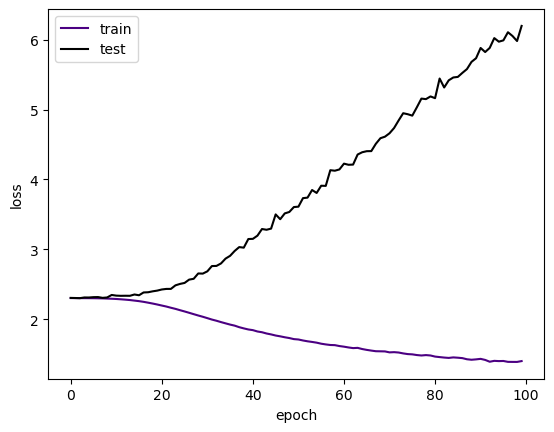

<Figure size 1000x600 with 0 Axes>

In [20]:
plt.plot(train_losses, label='train', color = "indigo")
plt.plot(test_losses, label='test', color = "black")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure(figsize=(10, 6))
plt.show()

In [18]:
train_losses

[2.302386798838308,
 2.301653457857144,
 2.3014089354574043,
 2.3010135449326117,
 2.3007170188147374,
 2.3001983608009975,
 2.2990794639343393,
 2.2976449776305827,
 2.2951180680728416,
 2.2925422567802705,
 2.2891980707009973,
 2.28474045613173,
 2.279601438213259,
 2.2738644410806423,
 2.266086713083263,
 2.2582052023426047,
 2.2482460755020823,
 2.236311966930625,
 2.2237403047110225,
 2.2101596052458548,
 2.195437767358223,
 2.1810408431583883,
 2.1637562808197446,
 2.147641797563923,
 2.128731378614267,
 2.1106866656590118,
 2.0916220882554044,
 2.072017790666267,
 2.0528860315839363,
 2.0347732613081617,
 2.0150422035758173,
 1.994752390044076,
 1.9778361109528206,
 1.9585150251510555,
 1.9405066369693162,
 1.9227681457360923,
 1.9077434771096529,
 1.8856467031466682,
 1.86842733863066,
 1.8530227672824982,
 1.8433211213235916,
 1.8240650775335998,
 1.8133222190047633,
 1.795299791323859,
 1.7822391511534832,
 1.7662477091685542,
 1.7547642223870576,
 1.7413513688390443,
 1.7301

In [19]:
test_losses

[2.304629947565779,
 2.303086799911306,
 2.300628532337237,
 2.310847339750845,
 2.3103122771540776,
 2.315154063550732,
 2.316470046586628,
 2.3053851791574984,
 2.3107986631272714,
 2.3465767027456548,
 2.3371982514103755,
 2.3344756047936936,
 2.335414892510523,
 2.3347542255739624,
 2.353355507307415,
 2.342561208749119,
 2.382468048530289,
 2.3853867536858666,
 2.3987405149242544,
 2.408960918836956,
 2.4250483573237553,
 2.4331069566026517,
 2.4334062684940387,
 2.4842805832247192,
 2.504726292211798,
 2.518721094614343,
 2.566074416607241,
 2.57799446733692,
 2.6543930844415593,
 2.652183209793477,
 2.6846221247805824,
 2.7601844751382174,
 2.7622096417825435,
 2.797731867319421,
 2.8667726516723633,
 2.9068267737762836,
 2.976341902455197,
 3.03167006335681,
 3.0234278968617887,
 3.1470481383649607,
 3.1494612663607056,
 3.1951189373112934,
 3.29024372523344,
 3.2795827117147325,
 3.295971912673757,
 3.499265055113201,
 3.430499113058742,
 3.513644927664648,
 3.534042485152619,